## LetsGrowMore

### Name: Sonia Tripathi
### LGM_Task1

### IRIS FLOWER DATASET

### Problem statement
The aim of this project is to classify flowers among setosa, versicolor, or virginica species on basis of length of sepals and petals and width of sepals and petals.
 

### Data Definition
6 Attributes present in the dataset are:


 **1. Id** - id
 
 **2. SepalLengthCm** - Length of the sepal in cm
 
 **3. SepalWidthCm** - Width of the sepal in cm
 
 **4. PetalLengthCm** - Length of the petal in cm
 
 **5. PetalWidthCm** - Width of the petal in cm
 
 **6. Species** - Species name

### IMPORT STATEMENTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
plt.rcParams['figure.figsize']=[15,8]

### Read Data

In [3]:
df=pd.read_csv("Iris.csv")

In [4]:
print('First 5 observation of iris dataset:')
df.head()

First 5 observation of iris dataset:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
print('Last 5 observation of iris dataset:')
df.tail()

Last 5 observation of iris dataset:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### Data Dimension

In [6]:
df.shape

(150, 6)

- The dataset has 6 columns and 150 observation.

### Data Types

In [7]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

- The data types are as per the data definition.
- Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm - Numerical Variables.
- Species - Categorical Variable

### Removing Insignificant Columns

In [8]:
df= df.drop(['Id'], axis = 1)

### 5 Point summary

In [9]:
df.describe(include='all')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


- from the above output, we can infer that :
    - there are no missing values since the count values for each of column is 150.
    - 5 point summary(min,25%,50%,75%,max), mean and Standard devation for different numerical variables can be seen.
    - For the Target[Species] variable there are 3 unique values present.

### Missing Values

In [10]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

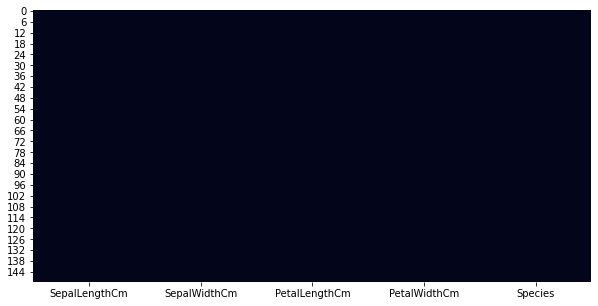

In [11]:
plt.figure(figsize=(10,5))
# plot heatmap to check null values 
sns.heatmap(df.isnull(), cbar=False)
plt.show()

- Missing values not present in the dataset

In [12]:
df_numeric_features = df.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

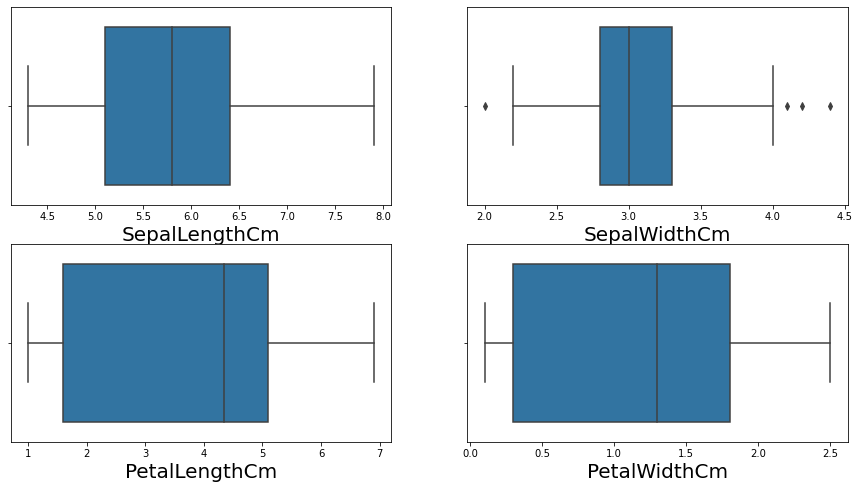

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
for variable, subplot in zip(df_numeric_features.columns, ax.flatten()):
    z = sns.boxplot(x = df_numeric_features[variable], orient = "h",whis=1.5 , ax=subplot)
    z.set_xlabel(variable, fontsize = 20)                                     

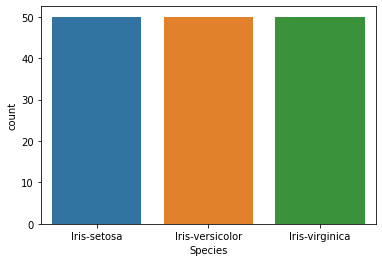

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(df['Species'])
plt.show()

- All the 3 species has same number of observation.

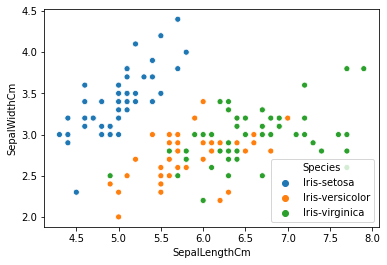

In [15]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=df)
plt.show()

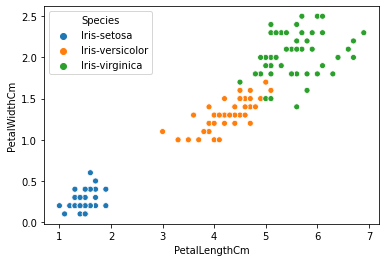

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=df)
plt.show()

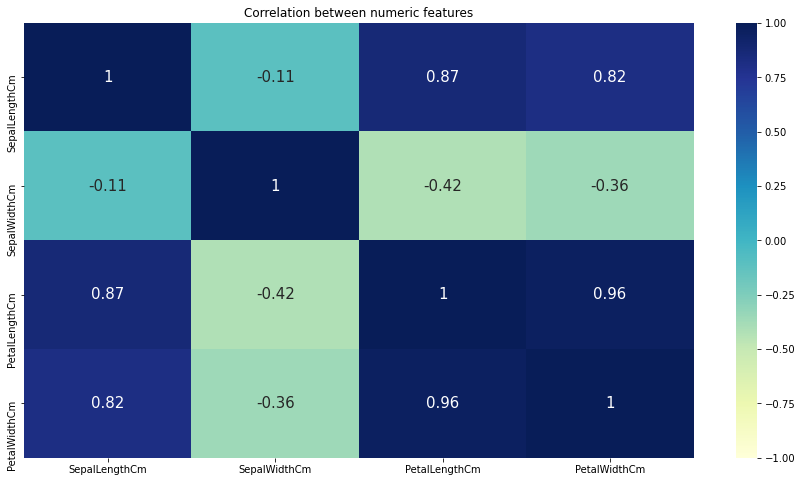

In [17]:
sns.heatmap(df_numeric_features.corr(), cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15} )
plt.title('Correlation between numeric features')
# display the plot
plt.show()

- The above heatmap, show that their is strong positive correlation between:
    - SepalLengthCm and PetalLengthCm with 0.87.
    - SepalLengthCm and PetalWidthCm with 0.82.
    - PetalLengthCm and PetalWidthCm with 0.96.

In [18]:
# Creating a copy of main dataset
df_copy=df.copy()

### Encoding for Categorical Variable

In [19]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
labelencoder = LabelEncoder()
df['species_label']= labelencoder.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [21]:
df['species_label'].unique()

array([0, 1, 2])

- Encoded values for the corresponding species name:
    - Iris-setosa - 0
    - Iris-versicolor - 1
    - Iris-virginica - 2

In [22]:
X = df.drop(["Species","species_label"], axis = 1)
y = df["species_label"]

In [23]:
X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [24]:
y.head(2)

0    0
1    0
Name: species_label, dtype: int32

In [25]:
sc = MinMaxScaler()
X = sc.fit_transform(X)
X[:10]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ]])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [27]:
X_train.shape

(120, 4)

In [28]:
X_test.shape

(30, 4)

### Logistic Regression Classification

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [30]:
print("Logistic Regression model score is", accuracy)

Logistic Regression model score is 0.9333333333333333


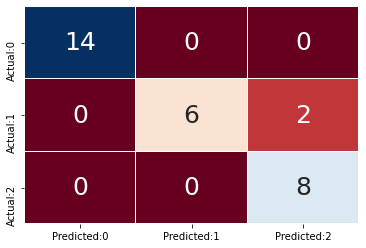

In [31]:
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1','Predicted:2'], index = ['Actual:0','Actual:1','Actual:2'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

### Decision Tree classification

In [32]:
decision_tree_classification = DecisionTreeClassifier()
# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train, y_train)

In [33]:
print("DecisionTree Model Score is : ",decision_tree.score(X_test,y_test))

DecisionTree Model Score is :  0.9333333333333333


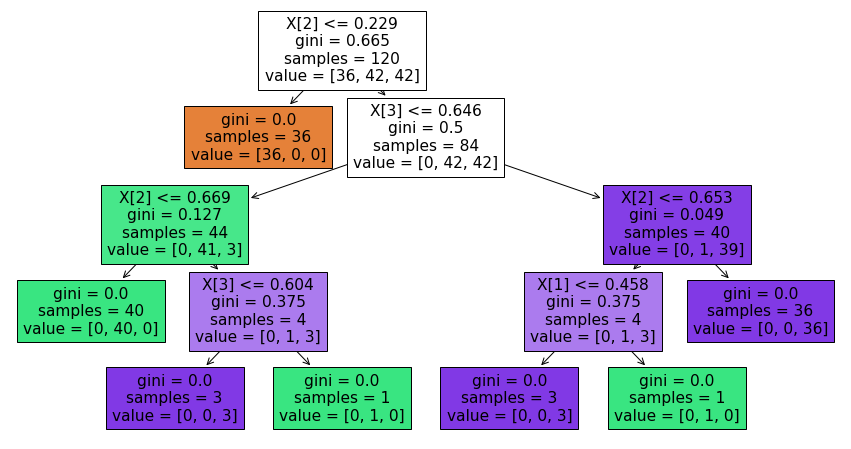

In [34]:
tree.plot_tree(decision_tree,filled=True)
plt.show()

In [35]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']}

In [37]:
grid_search = GridSearchCV(estimator=decision_tree_classification,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [38]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [39]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 9, 'splitter': 'random'}


In [40]:
grid_search.best_score_

0.9833333333333334

In [41]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth =11,min_samples_leaf= 3, min_samples_split= 9,  splitter ='random')
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=3, min_samples_split=9,
                       splitter='random')

In [42]:
dt.score(X_test,y_test)

0.9333333333333333

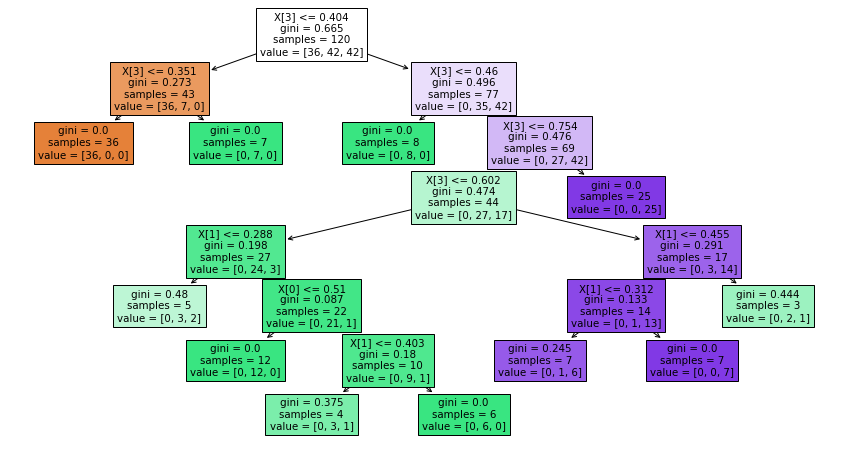

In [43]:
tree.plot_tree(dt,filled=True)
plt.show()

### KNN Classification

In [44]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [45]:
print("KNN model score is", accuracy)

KNN model score is 0.9666666666666667


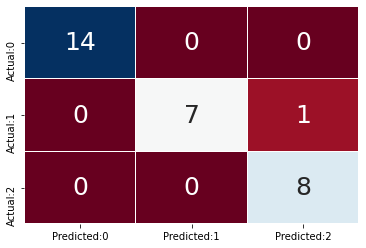

In [46]:
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1','Predicted:2'], index = ['Actual:0','Actual:1','Actual:2'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

### RandomForest

In [47]:
rf = RandomForestClassifier(random_state = 10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [48]:
print("Random_Forest model Score is : ", accuracy)

Random_Forest model Score is :  0.9666666666666667


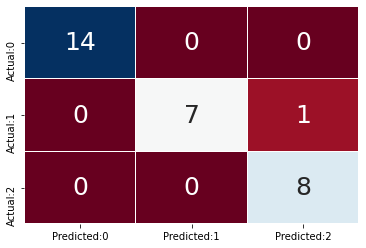

In [49]:
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1','Predicted:2'], index = ['Actual:0','Actual:1','Actual:2'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

### Random forest tuned_model

In [50]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 20, 30],#50, 70, 90
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 
    
random_forest_classification = RandomForestClassifier(random_state = 10)
# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)
# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train, y_train)
# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20} 



In [51]:
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 20)
# use fit() to fit the model on the train set
rf_model = rf_model.fit(X_train, y_train)

In [52]:
y_pred = rf_model.predict(X_test)
accuracy_rf_tuned = accuracy_score(y_test, y_pred)

In [53]:
print("Random_Forest Tuned Model Score is : ", accuracy_rf_tuned)

Random_Forest Tuned Model Score is :  0.9666666666666667


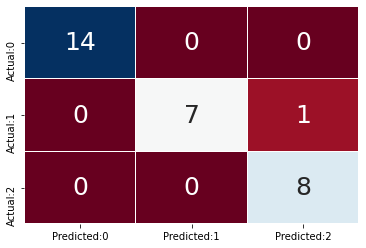

In [54]:
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1','Predicted:2'], index = ['Actual:0','Actual:1','Actual:2'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'RdBu' , cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()